In [62]:
import numpy as np
import pandas as pd
import xarray as xr
import yaml

# Plotting
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
from cmocean import cm
import hvplot.xarray
import xrscipy.signal as dsp
from xarrayutils.vertical_coordinates import linear_interpolation_regrid, linear_interpolation_remap
import gsw

purp = pd.read_pickle('../data/purp_colormap.pkl')
# set up figure params
sns.set(style='ticks', context='notebook',font_scale=1.3)
mpl.rc('figure', dpi=100, figsize=[12, 6])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

xr.set_options(display_style="text", display_width=100,warn_for_unclosed_files=True);

In [57]:
# Plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [58]:
def plotMap():
    #Set the projection information
    proj = ccrs.PlateCarree()
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(subplot_kw=dict(projection=proj))

    #Zoom in
    img_extent = [115, 145, 10, 35]
    ax.set_extent(img_extent, crs=proj)

#     ax.set_xticks([ 141,145,148], crs=ccrs.PlateCarree())
    #Add map features
    # ax.add_feature(cfeature.LAND, facecolor='0.9'
    # )  #Grayscale colors can be set using 0 (black) to 1 (white)

    land_50m = cfeature.NaturalEarthFeature('physical',
                                            'land',
                                            '50m',
                                            edgecolor='face',
                                            facecolor=cfeature.COLORS['land'])
    ax.add_feature(land_50m)
    ax.add_feature(
        cfeature.LAKES,
        alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS, zorder=10)
    # ax.add_feature(cfeature.COASTLINE, zorder=10)
    gshhs = cfeature.GSHHSFeature(scale='i', levels=None)
    ax.add_feature(gshhs)

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)

    #Add lat/lon gridlines every 20° to the map
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=True,
                      linewidth=0.1,
                      alpha=1,
                      linestyle='-')
    
    gl.xlabels_top = False
    gl.ylabels_left = False
#     gl.set_xticks(141)
#     gl.xlocator = mticker.FixedLocator(**[148, 0, 148]**)
    gl.xlocator = mticker.FixedLocator([141,146,151])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

#     ax.text(142.2, 43.5, 'Hokkaido', transform=proj)
#     ax.text(140.1, 39.7, 'Honshu', transform=proj)
    
#     
#     ax.set_xticks([144,145,146, 147], crs=ccrs.PlateCarree())
#     ax.set_yticks([34, 44], crs=ccrs.PlateCarree())

    return fig, ax

In [51]:
data = xr.open_dataset('../data/dataset-satellite-sea-level-global-31432cda-af57-4762-b862-ed857f8b6a10/dt_global_twosat_phy_l4_20200301_vDT2018.nc')

In [54]:
data = data.sel(longitude=slice(119,130), latitude=slice(10,35))

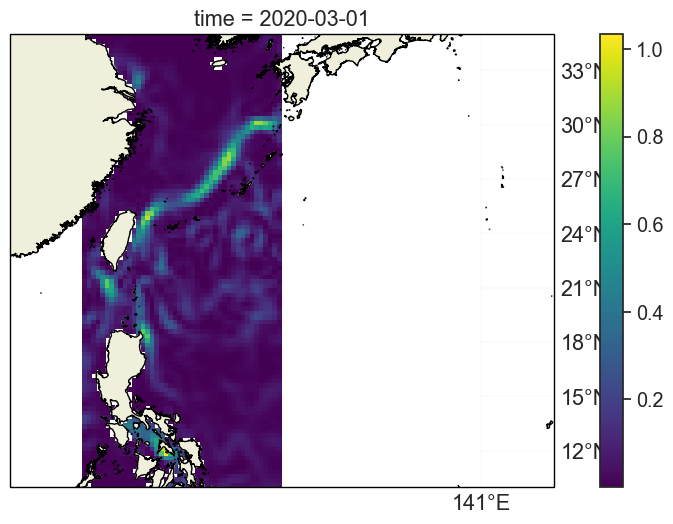

In [63]:
f, ax = plotMap()
(data.ugos**2 + data.vgos**2).plot(ax=ax)